
## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
car_data = pd.read_csv("/content/drive/MyDrive/Copy of car data.csv")

In [ ]:
car_data.shape

(301, 9)

In [ ]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
car_data.rename(columns={'Car_Name':'name','Year':'year','Selling_Price':'selling_price','Kms_Driven':'km_driven','Fuel_Type':'fuel','Seller_Type':'seller_type','Transmission':'transmission','Owner':'owner'}, inplace=True)

car_data.columns

Index(['name', 'year', 'selling_price', 'Present_Price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

In [ ]:
car_data.selling_price=car_data.selling_price*100000

In [ ]:
car_data.head()

,name,year,selling_price,Present_Price,km_driven,fuel,seller_type,transmission,owner
0,ritz,2014,335000.0,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,475000.0,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,725000.0,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,285000.0,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,460000.0,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_data_1=pd.read_csv("/content/drive/MyDrive/Copy of Car details v3.csv")
car_data_1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
car_data_1.shape

(8128, 13)

In [ ]:
car_dekho=pd.read_csv("/content/drive/MyDrive/Copy of CAR DETAILS FROM CAR DEKHO.csv")

car_dekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
car_dekho.shape

(4340, 8)

In [ ]:
new_data=pd.concat([car_data,car_dekho,car_data_1])

In [ ]:
new_data.shape

(12769, 14)

In [ ]:
new_data.head(5)

,name,year,selling_price,Present_Price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,ritz,2014,335000.0,5.59,27000,Petrol,Dealer,Manual,0,NaN,NaN,NaN,NaN,NaN
1,sx4,2013,475000.0,9.54,43000,Diesel,Dealer,Manual,0,NaN,NaN,NaN,NaN,NaN
2,ciaz,2017,725000.0,9.85,6900,Petrol,Dealer,Manual,0,NaN,NaN,NaN,NaN,NaN
3,wagon r,2011,285000.0,4.15,5200,Petrol,Dealer,Manual,0,NaN,NaN,NaN,NaN,NaN
4,swift,2014,460000.0,6.87,42450,Diesel,Dealer,Manual,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_data.year=2022-new_data.year

In [ ]:
new_data.head()

,name,year,selling_price,Present_Price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,ritz,8,335000.0,5.59,27000,Petrol,Dealer,Manual,0,NaN,NaN,NaN,NaN,NaN
1,sx4,9,475000.0,9.54,43000,Diesel,Dealer,Manual,0,NaN,NaN,NaN,NaN,NaN
2,ciaz,5,725000.0,9.85,6900,Petrol,Dealer,Manual,0,NaN,NaN,NaN,NaN,NaN
3,wagon r,11,285000.0,4.15,5200,Petrol,Dealer,Manual,0,NaN,NaN,NaN,NaN,NaN
4,swift,8,460000.0,6.87,42450,Diesel,Dealer,Manual,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_data.shape

(12769, 14)

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12769 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           12769 non-null  object 
 1   year           12769 non-null  int64  
 2   selling_price  12769 non-null  float64
 3   Present_Price  301 non-null    float64
 4   km_driven      12769 non-null  int64  
 5   fuel           12769 non-null  object 
 6   seller_type    12769 non-null  object 
 7   transmission   12769 non-null  object 
 8   owner          12769 non-null  object 
 9   mileage        7907 non-null   object 
 10  engine         7907 non-null   object 
 11  max_power      7913 non-null   object 
 12  torque         7906 non-null   object 
 13  seats          7907 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 1.5+ MB


In [ ]:
new_data.isnull().sum()

name                 0
year                 0
selling_price        0
Present_Price    12468
km_driven            0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage           4862
engine            4862
max_power         4856
torque            4863
seats             4862
dtype: int64

#### Steps To Do

1.Drop present_price.

2.mileage to int

3.engine to int

4.max-power to int/float

5.torque to numerical

6.seats to numerical

In [ ]:
new_data.drop(['Present_Price'], axis=1, inplace=True)

In [ ]:
new_data.mileage.unique()

array([nan, '23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl',
       '16.1 kmpl', '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', '18.9 kmpl', '18.15 kmpl',
       '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl', '25.5 kmpl',
       '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl', '24.7 kmpl',
       '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl', '18.6 kmpl',
       '33.44 km/kg', '23.95 kmpl', '17.0 kmpl', '20.63 kmpl',
       '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl', '12.55 kmpl',
       '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl', '20.65 kmpl',
       '27.3 kmpl', '11.36 kmpl', '17.68 kmpl', '14.28 kmpl',
       '18.53 kmpl', '14.84 kmpl', '21.12 kmpl', '20.36 kmpl',
       '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl', '20.51 kmpl',
       '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl', '20.54 kmpl',
       '22.77 kmpl', '15.71 kmpl', '23.1 kmpl', '19.02 kmpl',
       '19.81 kmpl'

In [ ]:
new_data.mileage=new_data.mileage.str.replace('kmpl','')
new_data.mileage=new_data.mileage.str.replace('km/kg','')

In [ ]:
new_data.mileage=pd.to_numeric(new_data.mileage, errors='coerce')

In [ ]:
new_data.mileage.isnull().sum()

4862

In [ ]:
mileage_median=new_data.mileage.median()

In [ ]:
new_data.mileage.fillna(mileage_median, inplace=True)

In [ ]:
new_data.mileage.isnull().sum()

0

In [ ]:
new_data.mileage.unique()

array([19.3 , 23.4 , 21.14, 17.7 , 23.  , 16.1 , 20.14, 17.3 , 23.59,
       20.  , 19.01, 18.9 , 18.15, 24.52, 19.7 , 22.54, 21.  , 25.5 ,
       26.59, 21.5 , 20.3 , 21.4 , 24.7 , 18.2 , 16.8 , 24.3 , 14.  ,
       18.6 , 33.44, 23.95, 17.  , 20.63, 13.93, 16.  , 17.8 , 18.5 ,
       12.55, 12.99, 14.8 , 13.5 , 26.  , 20.65, 27.3 , 11.36, 17.68,
       14.28, 18.53, 14.84, 21.12, 20.36, 21.27, 18.16, 22.  , 25.1 ,
       20.51, 21.66, 25.2 , 22.9 , 16.02, 20.54, 22.77, 15.71, 23.1 ,
       19.02, 19.81, 26.2 , 16.47, 15.04, 19.1 , 21.79, 18.8 , 21.21,
       15.37, 11.79, 19.  , 14.3 , 15.8 , 15.1 , 19.09, 22.32, 21.9 ,
       14.53, 21.63, 20.85, 20.45, 19.67, 23.01, 20.77, 17.92, 17.01,
       22.37, 19.33,  9.5 , 12.83, 22.48, 16.78, 14.67, 15.  , 13.96,
       18.  , 12.07, 26.21, 10.8 , 16.3 , 13.6 , 14.74, 15.6 , 19.56,
       22.69, 19.16, 18.12, 12.1 , 17.5 , 42.  , 20.4 , 21.1 , 19.44,
       13.  , 21.43, 22.95, 16.2 , 15.3 , 28.09, 17.4 , 19.4 , 26.6 ,
       17.6 , 28.4 ,

In [ ]:
new_data.engine.unique()

array([nan, '1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC',
       '1197 CC', '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC',
       '993 CC', '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

In [ ]:
new_data.engine=new_data.engine.str.replace('CC',' ')

In [ ]:
new_data.engine=pd.to_numeric(new_data.engine, errors='coerce')

In [ ]:
ENGINE_MEDIAN=new_data.engine.median()

In [ ]:
ENGINE_MEDIAN

1248.0

In [ ]:
new_data.engine.fillna(ENGINE_MEDIAN, inplace=True)

new_data.engine.isnull().sum()

0

In [ ]:
new_data.engine.unique()

array([1248., 1498., 1497., 1396., 1298., 1197., 1061.,  796., 1364.,
       1399., 1461.,  993., 1198., 1199.,  998., 1591., 2179., 1368.,
       2982., 2494., 2143., 2477., 1462., 2755., 1968., 1798., 1196.,
       1373., 1598., 1998., 1086., 1194., 1172., 1405., 1582.,  999.,
       2487., 1999., 3604., 2987., 1995., 1451., 1969., 2967., 2497.,
       1797., 1991., 2362., 1493., 1599., 1341., 1794.,  799., 1193.,
       2696., 1495., 1186., 1047., 2498., 2956., 2523., 1120.,  624.,
       1496., 1984., 2354.,  814.,  793., 1799.,  936., 1956., 1997.,
       1499., 1948., 2997., 2489., 2499., 2609., 2953., 1150., 1994.,
       1388., 1527., 2199.,  995., 2993., 1586., 1390.,  909., 2393.,
       3198., 1339., 2835., 2092., 1595., 2496., 1596., 1597., 2596.,
       2148., 1299., 1590., 2231., 2694., 2200., 1795., 1896., 1796.,
       1422., 1489., 2359., 2197., 2999., 1781., 2650., 1343., 2446.,
       3498., 2198., 2776., 1950.])

In [ ]:
new_data.max_power.unique()

array([nan, '74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', '67 bhp', '82 bhp', '88.5 bhp',
       '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp', '88.8 bhp',
       '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp', '34.2 bhp',
       '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp', '138.03 bhp',
       '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp', '67.05 bhp',
       '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp', '175.56 bhp',
       '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp', '187.74 bhp',
       '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp', '108.495 bhp',
       '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp', '189 bhp',
       '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp', '81.80 bhp',
       '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp', '155 bhp',
       '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp', '126.2 bhp',
       '98.

In [ ]:
new_data.max_power=new_data.max_power.str.replace('bhp','')

new_data.max_power=pd.to_numeric(new_data.max_power, errors='coerce')

max_median=new_data.max_power.median()

new_data.max_power.fillna(max_median, inplace=True)

new_data.max_power.isnull().sum()

0

In [ ]:
new_data.max_power.unique()

array([ 82.   ,  74.   , 103.52 ,  78.   ,  90.   ,  88.2  ,  81.86 ,
        57.5  ,  37.   ,  67.1  ,  68.1  , 108.45 ,  60.   ,  73.9  ,
        67.   ,  88.5  ,  46.3  ,  88.73 ,  64.1  ,  98.6  ,  88.8  ,
        83.81 ,  83.1  ,  47.3  ,  73.8  ,  34.2  ,  35.   ,  81.83 ,
        40.3  , 121.3  , 138.03 , 160.77 , 117.3  , 116.3  ,  83.14 ,
        67.05 , 168.5  , 100.   , 120.7  ,  98.63 , 175.56 , 103.25 ,
       171.5  , 100.6  , 174.33 , 187.74 , 170.   ,  78.9  ,  88.76 ,
        86.8  , 108.495, 108.62 ,  93.7  , 103.6  ,  98.59 , 189.   ,
        67.04 ,  68.05 ,  58.2  ,  82.85 ,  81.8  ,  73.   , 120.   ,
        94.68 , 160.   ,  65.   , 155.   ,  69.01 , 126.32 , 138.1  ,
        83.8  , 126.2  ,  98.96 ,  62.1  ,  86.7  , 188.   , 214.56 ,
       177.   , 280.   , 148.31 , 254.79 , 190.   , 177.46 , 204.   ,
       141.   , 117.6  , 241.4  , 282.   , 150.   , 147.5  , 108.5  ,
       103.5  , 183.   , 181.04 , 157.7  , 164.7  ,  91.1  , 400.   ,
        68.   ,  75.

In [ ]:
new_data.torque.unique()  




array([nan, '190Nm@ 2000rpm', '250Nm@ 1500-2500rpm',
       '12.7@ 2,700(kgm@ rpm)', '22.4 kgm at 1750-2750rpm',
       '11.5@ 4,500(kgm@ rpm)', '113.75nm@ 4000rpm',
       '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm', '170Nm@ 1800-2400rpm',
       '160Nm@ 2000rpm', '248Nm@ 2250rpm', '78Nm@ 4500rpm',
       '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm', '200Nm@ 1750rpm',
       '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm', '114Nm@ 3500rpm',
       '115Nm@ 4000rpm', '69Nm@ 3500rpm', '172.5Nm@ 1750rpm',
       '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm', '60Nm@ 3500rpm',
       '90Nm@ 3500rpm', '151Nm@ 4850rpm', '104Nm@ 4000rpm',
       '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm', '145Nm@ 4600rpm',
       '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm', '200Nm@ 1400-3400rpm',
       '200Nm@ 1250-4000rpm', '400Nm@ 2000-2500rpm', '138Nm@ 4400rpm',
       '360Nm@ 1200-3400rpm', '200Nm@ 1200-3600rpm',
       '380Nm@ 1750-2500rpm', '173Nm@ 4000rpm', '400Nm@ 1750-3000rpm',
       '400Nm@ 1400-2800rpm', '200Nm@ 1750-3000rp

In [ ]:
seat_med=new_data.seats.median()

new_data.seats.fillna(seat_med, inplace=True)

new_data.seats.isnull().sum()

0

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12769 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           12769 non-null  object 
 1   year           12769 non-null  int64  
 2   selling_price  12769 non-null  float64
 3   km_driven      12769 non-null  int64  
 4   fuel           12769 non-null  object 
 5   seller_type    12769 non-null  object 
 6   transmission   12769 non-null  object 
 7   owner          12769 non-null  object 
 8   mileage        12769 non-null  float64
 9   engine         12769 non-null  float64
 10  max_power      12769 non-null  float64
 11  torque         7906 non-null   object 
 12  seats          12769 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 1.4+ MB


In [ ]:
cat=new_data.describe(include=['object','category']).columns
cat

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'torque'], dtype='object')

In [ ]:
new_data.name.value_counts()

Maruti Swift Dzire VDI                        198
Maruti Alto 800 LXI                           141
Maruti Alto LXi                               118
Maruti Swift VDI BSIV                          88
Maruti Swift VDI                               88
                                             ... 
Hyundai Sonata AT Leather                       1
Maruti S-Cross 2017-2020 Sigma DDiS 200 SH      1
Maruti Ciaz 1.4 Zeta                            1
Honda Jazz 1.2 S AT i VTEC                      1
Maruti Swift VXI BSIII W/ ABS                   1
Name: name, Length: 2609, dtype: int64

In [ ]:
new_data.fuel.value_counts()

Diesel      6615
Petrol      5993
CNG           99
LPG           61
Electric       1
Name: fuel, dtype: int64

In [ ]:
new_data.seller_type.value_counts()

Individual          10116
Dealer               2315
Trustmark Dealer      338
Name: seller_type, dtype: int64

In [ ]:
new_data.transmission.value_counts()

Manual       11231
Automatic     1538
Name: transmission, dtype: int64

In [ ]:
new_data.owner.value_counts()

First Owner             8121
Second Owner            3211
Third Owner              859
0                        290
Fourth & Above Owner     255
Test Drive Car            22
1                         10
3                          1
Name: owner, dtype: int64

In [ ]:
new_data.owner.replace({0:'First Owner',1:'Second Owner',3:'Third Owner'},inplace=True)

In [ ]:
new_data.owner.value_counts().reset_index()

,index,owner
0,First Owner,8411
1,Second Owner,3221
2,Third Owner,860
3,Fourth & Above Owner,255
4,Test Drive Car,22


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12769 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           12769 non-null  object 
 1   year           12769 non-null  int64  
 2   selling_price  12769 non-null  float64
 3   km_driven      12769 non-null  int64  
 4   fuel           12769 non-null  object 
 5   seller_type    12769 non-null  object 
 6   transmission   12769 non-null  object 
 7   owner          12769 non-null  object 
 8   mileage        12769 non-null  float64
 9   engine         12769 non-null  float64
 10  max_power      12769 non-null  float64
 11  torque         7906 non-null   object 
 12  seats          12769 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 1.4+ MB


In [ ]:
# # # One hot encoding
new_latest = pd.get_dummies(new_data, columns=["fuel", "seller_type","transmission","owner"], 
prefix=["fuel_type", "seller_ty","trans",'owner_type'])
new_latest.head(20)

,name,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,seller_ty_Dealer,seller_ty_Individual,seller_ty_Trustmark Dealer,trans_Automatic,trans_Manual,owner_type_First Owner,owner_type_Fourth & Above Owner,owner_type_Second Owner,owner_type_Test Drive Car,owner_type_Third Owner
0,ritz,8,335000.0,27000,19.3,1248.0,82.0,NaN,5.0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0
1,sx4,9,475000.0,43000,19.3,1248.0,82.0,NaN,5.0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0
2,ciaz,5,725000.0,6900,19.3,1248.0,82.0,NaN,5.0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0
3,wagon r,11,285000.0,5200,19.3,1248.0,82.0,NaN,5.0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0
4,swift,8,460000.0,42450,19.3,1248.0,82.0,NaN,5.0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0
5,vitara brezza,4,925000.0,2071,19.3,1248.0,82.0,NaN,5.0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0
6,ciaz,7,675000.0,18796,19.3,1248.0,82.0,NaN,5.0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0
7,s cross,7,650000.0,33429,19.3,1248.0,82.0,NaN,5.0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0
8,ciaz,6,875000.0,20273,19.3,1248.0,82.0,NaN,5.0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0
9,ciaz,7,745000.0,42367,19.3,1248.0,82.0,NaN,5.0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0


In [ ]:
new_latest.torque.unique()

array([nan, '190Nm@ 2000rpm', '250Nm@ 1500-2500rpm',
       '12.7@ 2,700(kgm@ rpm)', '22.4 kgm at 1750-2750rpm',
       '11.5@ 4,500(kgm@ rpm)', '113.75nm@ 4000rpm',
       '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm', '170Nm@ 1800-2400rpm',
       '160Nm@ 2000rpm', '248Nm@ 2250rpm', '78Nm@ 4500rpm',
       '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm', '200Nm@ 1750rpm',
       '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm', '114Nm@ 3500rpm',
       '115Nm@ 4000rpm', '69Nm@ 3500rpm', '172.5Nm@ 1750rpm',
       '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm', '60Nm@ 3500rpm',
       '90Nm@ 3500rpm', '151Nm@ 4850rpm', '104Nm@ 4000rpm',
       '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm', '145Nm@ 4600rpm',
       '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm', '200Nm@ 1400-3400rpm',
       '200Nm@ 1250-4000rpm', '400Nm@ 2000-2500rpm', '138Nm@ 4400rpm',
       '360Nm@ 1200-3400rpm', '200Nm@ 1200-3600rpm',
       '380Nm@ 1750-2500rpm', '173Nm@ 4000rpm', '400Nm@ 1750-3000rpm',
       '400Nm@ 1400-2800rpm', '200Nm@ 1750-3000rp

In [ ]:
new_latest.dropna(axis=1,inplace=True)

In [ ]:
new_latest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12769 entries, 0 to 8127
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   name                             12769 non-null  object 
 1   year                             12769 non-null  int64  
 2   selling_price                    12769 non-null  float64
 3   km_driven                        12769 non-null  int64  
 4   mileage                          12769 non-null  float64
 5   engine                           12769 non-null  float64
 6   max_power                        12769 non-null  float64
 7   seats                            12769 non-null  float64
 8   fuel_type_CNG                    12769 non-null  uint8  
 9   fuel_type_Diesel                 12769 non-null  uint8  
 10  fuel_type_Electric               12769 non-null  uint8  
 11  fuel_type_LPG                    12769 non-null  uint8  
 12  fuel_type_Petrol   

In [ ]:
new_begin=new_latest.iloc[:,0:8]

In [ ]:
new_begin.head()

,name,year,selling_price,km_driven,mileage,engine,max_power,seats
0,ritz,8,335000.0,27000,19.3,1248.0,82.0,5.0
1,sx4,9,475000.0,43000,19.3,1248.0,82.0,5.0
2,ciaz,5,725000.0,6900,19.3,1248.0,82.0,5.0
3,wagon r,11,285000.0,5200,19.3,1248.0,82.0,5.0
4,swift,8,460000.0,42450,19.3,1248.0,82.0,5.0


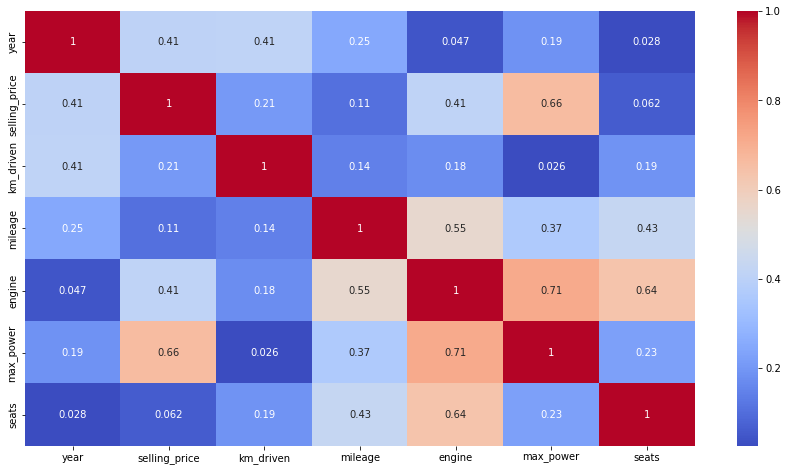

In [ ]:
new_begin.corr()
plt.figure(figsize=(15,8))
correlation = new_begin.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(new_begin[[i for i in new_begin.describe().columns if i not in ['selling_price']]])

,variables,VIF
0,year,5.805886
1,km_driven,3.376452
2,mileage,20.657646
3,engine,53.621013
4,max_power,24.240336
5,seats,60.990706


In [ ]:
calc_vif(new_begin[[i for i in new_begin.describe().columns if i not in ['selling_price','seats']]])

,variables,VIF
0,year,5.589735
1,km_driven,3.376352
2,mileage,8.661992
3,engine,24.906258
4,max_power,22.348635


In [ ]:
calc_vif(new_begin[[i for i in new_begin.describe().columns if i not in ['selling_price','engine','seats']]])

,variables,VIF
0,year,5.456119
1,km_driven,3.161348
2,mileage,8.578545
3,max_power,6.756979


In [ ]:
calc_vif(new_begin[[i for i in new_begin.describe().columns if i not in ['selling_price','mileage','seats','engine']]])

,variables,VIF
0,year,4.553850
1,km_driven,3.154544
2,max_power,3.352788


In [ ]:
features=new_latest.iloc[:,9:]
features

,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,seller_ty_Dealer,seller_ty_Individual,seller_ty_Trustmark Dealer,trans_Automatic,trans_Manual,owner_type_First Owner,owner_type_Fourth & Above Owner,owner_type_Second Owner,owner_type_Test Drive Car,owner_type_Third Owner
0,0,0,0,1,1,0,0,0,1,1,0,0,0,0
1,1,0,0,0,1,0,0,0,1,1,0,0,0,0
2,0,0,0,1,1,0,0,0,1,1,0,0,0,0
3,0,0,0,1,1,0,0,0,1,1,0,0,0,0
4,1,0,0,0,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0,0,0,1,0,1,0,0,1,1,0,0,0,0
8124,1,0,0,0,0,1,0,0,1,0,1,0,0,0
8125,1,0,0,0,0,1,0,0,1,1,0,0,0,0
8126,1,0,0,0,0,1,0,0,1,1,0,0,0,0


In [ ]:
new_latest.copy()

,name,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,seller_ty_Dealer,seller_ty_Individual,seller_ty_Trustmark Dealer,trans_Automatic,trans_Manual,owner_type_First Owner,owner_type_Fourth & Above Owner,owner_type_Second Owner,owner_type_Test Drive Car,owner_type_Third Owner
0,ritz,8,335000.0,27000,19.30,1248.0,82.00,5.0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0
1,sx4,9,475000.0,43000,19.30,1248.0,82.00,5.0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0
2,ciaz,5,725000.0,6900,19.30,1248.0,82.00,5.0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0
3,wagon r,11,285000.0,5200,19.30,1248.0,82.00,5.0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0
4,swift,8,460000.0,42450,19.30,1248.0,82.00,5.0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,9,320000.0,110000,18.50,1197.0,82.85,5.0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
8124,Hyundai Verna CRDi SX,15,135000.0,119000,16.80,1493.0,110.00,5.0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
8125,Maruti Swift Dzire ZDi,13,382000.0,120000,19.30,1248.0,73.90,5.0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
8126,Tata Indigo CR4,9,290000.0,25000,23.57,1396.0,70.00,5.0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0


In [ ]:
final=new_latest.copy().drop(['mileage','seats','engine', 'name'],axis=1)

In [ ]:
final.head()

,year,selling_price,km_driven,max_power,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,seller_ty_Dealer,seller_ty_Individual,seller_ty_Trustmark Dealer,trans_Automatic,trans_Manual,owner_type_First Owner,owner_type_Fourth & Above Owner,owner_type_Second Owner,owner_type_Test Drive Car,owner_type_Third Owner
0,8,335000.0,27000,82.0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0
1,9,475000.0,43000,82.0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0
2,5,725000.0,6900,82.0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0
3,11,285000.0,5200,82.0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0
4,8,460000.0,42450,82.0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0


In [ ]:
from scipy.stats import zscore
#Train test split
#numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = final.drop(['selling_price'], axis=1)

In [ ]:
X.apply(zscore)

,year,km_driven,max_power,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,seller_ty_Dealer,seller_ty_Individual,seller_ty_Trustmark Dealer,trans_Automatic,trans_Manual,owner_type_First Owner,owner_type_Fourth & Above Owner,owner_type_Second Owner,owner_type_Test Drive Car,owner_type_Third Owner
0,-0.108110,-0.766494,-0.206407,-0.088395,-1.036779,-0.00885,-0.069283,1.063321,2.125033,-1.952701,-0.164894,-0.370057,0.370057,0.719813,-0.142749,-0.580817,-0.041544,-0.268727
1,0.136175,-0.466054,-0.206407,-0.088395,0.964526,-0.00885,-0.069283,-0.940449,2.125033,-1.952701,-0.164894,-0.370057,0.370057,0.719813,-0.142749,-0.580817,-0.041544,-0.268727
2,-0.840967,-1.143922,-0.206407,-0.088395,-1.036779,-0.00885,-0.069283,1.063321,2.125033,-1.952701,-0.164894,-0.370057,0.370057,0.719813,-0.142749,-0.580817,-0.041544,-0.268727
3,0.624747,-1.175844,-0.206407,-0.088395,-1.036779,-0.00885,-0.069283,1.063321,2.125033,-1.952701,-0.164894,-0.370057,0.370057,0.719813,-0.142749,-0.580817,-0.041544,-0.268727
4,-0.108110,-0.476381,-0.206407,-0.088395,0.964526,-0.00885,-0.069283,-0.940449,2.125033,-1.952701,-0.164894,-0.370057,0.370057,0.719813,-0.142749,-0.580817,-0.041544,-0.268727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0.136175,0.792040,-0.176658,-0.088395,-1.036779,-0.00885,-0.069283,1.063321,-0.470581,0.512111,-0.164894,-0.370057,0.370057,0.719813,-0.142749,-0.580817,-0.041544,-0.268727
8124,1.601889,0.961038,0.773558,-0.088395,0.964526,-0.00885,-0.069283,-0.940449,-0.470581,0.512111,-0.164894,-0.370057,0.370057,-1.389249,7.005320,-0.580817,-0.041544,-0.268727
8125,1.113318,0.979816,-0.489896,-0.088395,0.964526,-0.00885,-0.069283,-0.940449,-0.470581,0.512111,-0.164894,-0.370057,0.370057,0.719813,-0.142749,-0.580817,-0.041544,-0.268727
8126,0.136175,-0.804049,-0.626391,-0.088395,0.964526,-0.00885,-0.069283,-0.940449,-0.470581,0.512111,-0.164894,-0.370057,0.370057,0.719813,-0.142749,-0.580817,-0.041544,-0.268727


In [ ]:
y = np.log10(final['selling_price'])

In [ ]:
y.mean()

5.597774380270459

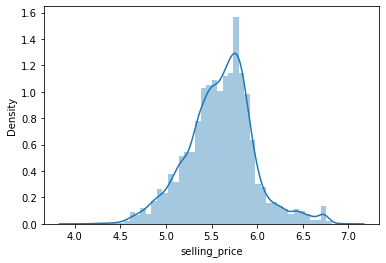

In [ ]:
sns.distplot(y)

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(10215, 18)
(2554, 18)


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.7612407982539462

In [ ]:
reg.coef_

array([-4.86420640e-02, -1.24466028e-07,  4.17442429e-03, -7.69227132e-02,
        1.11127321e-01,  9.59060559e-02, -5.59795390e-02, -7.41311248e-02,
        5.51672984e-03, -6.91412022e-02,  6.36244724e-02,  9.51460172e-02,
       -9.51460172e-02, -4.83566562e-03, -4.75404695e-02, -2.76855661e-02,
        1.12991405e-01, -3.29297033e-02])

In [ ]:
reg.intercept_

5.7661655834901815

In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([5.54397594, 5.92727285, 5.78546964, ..., 5.41280164, 4.95187139,
       6.21276204])

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 110901852383.73354
RMSE : 333019.2973143351


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7575048910837489
Adjusted R2 :  0.7557830323222133


In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.7611562527878524

In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -0.03378290698411911


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 110868005605.3914
RMSE : 332968.4753927786
R2 : 0.7575788995698483
Adjusted R2 :  0.755857566312356


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -0.03378639551689083


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 110827246165.88893
RMSE : 332907.2636123894
R2 : 0.7576680231012327
Adjusted R2 :  0.7559473226735491
